# Global mean Sea Surface Temperatures

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter

from dask.distributed import Client
from dask import delayed
import dask

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

from shapely.geometry import Polygon, Point
from shapely.ops import transform
import pyproj

plt.rcParams['figure.figsize'] = (10, 4)

In [3]:
from FuncionesArea import seleccionaArea

In [2]:
from globales import *

>>>>>---------------------------------------------------------------------------<<<<<
    > Linux rossby 6.8.0-59-generic #61-Ubuntu SMP PREEMPT_DYNAMIC Fri Apr 11 23
    >
    > home    - /home/pvb
    > ProPath - /home/pvb/Proyectos
    > AnaPath - /home/pvb/Analisis
    > DatPath - /data/pvb
    > ArgoDta - /data/pvb/Argo
>>>>>---------------------------------------------------------------------------<<<<<


In [4]:
year1= 1982
year2= 2025

In [5]:
# Settings compute de climatoloy
yearC1='1982'
yearC2='1992'

# Inicio

## Load data

In [6]:
base_file = GlobalSU['DatPath'] + '/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'

In [7]:
files = [f'{base_file}.{year}.nc' for year in range(year1, year2+1)]

In [8]:
DS = xr.open_mfdataset(files,parallel=True, 
                       combine_attrs= "drop",
                       autoclose = True, data_vars='minimal', coords="minimal")

In [ ]:
Xr=[-9.7299+360,  -15.2693+360,  -16.0000+360, -17.7162+360];
Yr=[32.1623,   24.8980,   29.7545,  18.9396];
Tr=['UP1','UP2','OC','DW']

In [11]:
for i1 in range(0,4):
    print(i1)
    ## Daily analisis
    sstd=DS.sst.sel(lat=Yr[i1],lon=Xr[i1],method='nearest').load()
    #sstd_clim = sstd.sel(time=slice(yearC1,yearC2)).groupby('time.dayofyear').mean(dim='time').load();
    #sstd_anom = sstd.groupby('time.dayofyear') - sstd_clim

    ## Monthly analisis
    sstm = sstd.resample(time='ME').mean(dim='time',skipna=True).load()
    #sstm_clim = sstm.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();
    #sstm_anom = sstm.groupby('time.month') - sstm_clim

    sstd.to_netcdf("./data2/sstd.{0:3s}.nc".format(Tr[i1]))
    #sstd_anom.to_netcdf("./data2/sstd_anom.{0:02d}.nc".format(i1))
    

    sstm.to_netcdf("./data2/sstm.{0:3s}.nc".format(Tr[i1]))
    #sstm_anom.to_netcdf("./data2/sstm_anom.{0:02d}.nc".format(i1))
    


0
1
2
3


In [19]:
z=DS.sst[-1,:,:].sel(lon=slice(340,359),lat=slice(20,40))

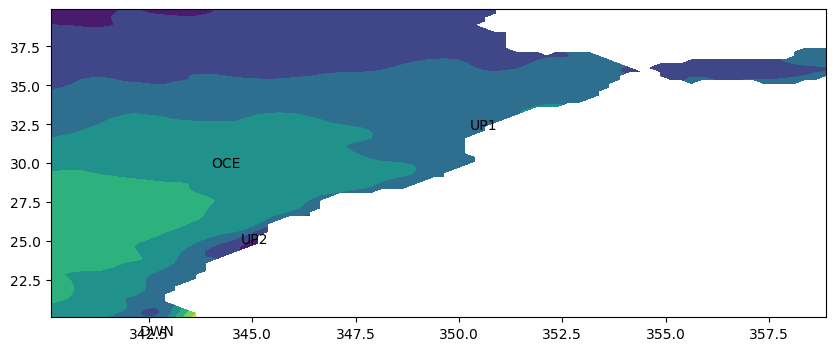

: 

In [ ]:
fig,ax=plt.subplots()
ax.contourf(z.lon,z.lat,z)

for i1 in range(0,4):
    ax.text(Xr[i1],Yr[i1],"{0:3s}".format(Tr[i1]))